In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [20]:
nlp_sum = pd.read_csv("nlp_sum.csv")
nlp_sum.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,0,Alexander Crosson,172,1,4,NaN,3.0,NLP,"Extracting names, emails and phone numbers",2016,https://medium.com/@acrosson/extracting-names-...
1,1,1,Alexis Perrier,45,1,4,NaN,8.0,NLP,Topic Modeling of Twitter Timelines in Python,2016,https://medium.com/@alexisperrier/topic-modeli...
2,2,2,satoru,56,1,4,NaN,1.0,NLP,How to manually download a nltk corpus?,2016,https://medium.com/@satorulogic/how-to-manuall...
3,3,3,Roy Pereira,50,1,4,Chatbots Magazine,5.0,NLP,The Three Levels of Usefulness for Chatbots,2016,https://chatbotsmagazine.com/the-three-levels-...
4,4,4,Abhishek Jha,3,1,4,NaN,3.0,NLP,Natural Language Processing(NLP) for Dummies!!,2016,https://medium.com/@jha0109/natural-language-p...


In [21]:
nlp_sum.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [22]:
nlp_sum.drop(['Unnamed: 0', '0'], axis=1, inplace=True)

In [23]:
nlp_sum.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [34]:
#nlp_sum.rename(columns={'9':"y", '4':"m", '3':"d", '8':"title", '1':"author",  '5':"publication", '2':"claps",'6':"readtime", '7':"tag",   '10':"url"})
nlp_sum = nlp_sum.rename(columns={'1':"author", '2':"claps", '3':"d", '4':"m", '5':"publication", '6':"readtime", '7':"tag", '8':"title", '9':"y", '10':"url"})

In [35]:
nlp_sum.columns

Index(['author', 'claps', 'd', 'm', 'publication', 'readtime', 'tag', 'title',
       'y', 'url'],
      dtype='object')

In [37]:
nlp_sum = nlp_sum[["y", "m", "d", "title", "author", "publication", "claps", "readtime", "tag", "url"]]

In [38]:
nlp_sum.drop_duplicates(subset=["title", "author"], inplace=True)

In [39]:
nlp_sum.shape

(4497, 10)

In [40]:
nlp_sum.head()

,y,m,d,title,author,publication,claps,readtime,tag,url
0,2016,4,1,"Extracting names, emails and phone numbers",Alexander Crosson,NaN,172,3.0,NLP,https://medium.com/@acrosson/extracting-names-...
1,2016,4,1,Topic Modeling of Twitter Timelines in Python,Alexis Perrier,NaN,45,8.0,NLP,https://medium.com/@alexisperrier/topic-modeli...
2,2016,4,1,How to manually download a nltk corpus?,satoru,NaN,56,1.0,NLP,https://medium.com/@satorulogic/how-to-manuall...
3,2016,4,1,The Three Levels of Usefulness for Chatbots,Roy Pereira,Chatbots Magazine,50,5.0,NLP,https://chatbotsmagazine.com/the-three-levels-...
4,2016,4,1,Natural Language Processing(NLP) for Dummies!!,Abhishek Jha,NaN,3,3.0,NLP,https://medium.com/@jha0109/natural-language-p...


In [42]:
nlp_sum.isnull().sum()

y                 0
m                 0
d                 0
title           152
author            2
publication    2368
claps             0
readtime        114
tag               0
url               0
dtype: int64

In [43]:
nlp_sum["title"].fillna("no_title", inplace=True)

In [44]:
counter = 0
tutolials = []

for x in nlp_sum["title"]:
    if "tutorial" in x:
        tutolials.append(counter)
        counter += 1
    elif "Tutorial" in x:
        tutolials.append(counter)
        counter += 1
    else:
        counter += 1

In [45]:
len(tutolials)

27

In [49]:
tutolial_url = nlp_sum.iloc[tutolials, 9]

In [50]:
tutolial_url

942      https://cli.traan.vn/how-to-create-a-facebook-...
944      https://rominirani.com/tutorial-google-cloud-n...
2146     https://medium.com/machine-learning-in-practic...
2646     https://medium.com/@SAPCAI/turning-your-chatbo...
2690     https://medium.com/easyread/tutorial-pembuatan...
2812     https://chatbotsmagazine.com/nodejs-chatbot-tu...
3244     https://medium.com/@mishra.thedeepak/doc2vec-s...
3441     https://medium.com/dair-ai/textql-colorless-gr...
3547     https://medium.com/sciforce/nlp-in-online-cour...
3570     https://medium.com/datos-y-ciencia/preprocesam...
3950     https://medium.com/nearist-ai/word2vec-tutoria...
3951     https://medium.com/nearist-ai/word2vec-tutoria...
4188     https://planetachatbot.com/tutorial-implementa...
4302     https://medium.com/dair-ai/deep-infomax-image-...
4461     https://medium.com/@qempsil0914/machine-learni...
4509     https://medium.com/@ishan.cdixit/pythons-natur...
4769     https://medium.com/@robeceiro/golang-dialogflo.

In [51]:
tutolial_titles = nlp_sum.iloc[tutolials, 3]

In [52]:
tutolial_titles

942      How to create a Facebook Bot in 10 minutes: Th...
944           Tutorial : Google Cloud Natural Language API
2146     Over 150 of the Best Machine Learning, NLP, an...
2646     Turning your chatbot into an Alexa skill: a st...
2690     Tutorial pembuatan Bot peminjaman barang seder...
2812     NodeJS chatbot tutorial: A movie bot with Reca...
3244                               DOC2VEC gensim tutorial
3441     TextQL, Colorless Green RNNs, ConvAI2, Machine...
3547     Here is another one tutorial by Richard Socher...
3570     Preprocesamiento de datos de texto: un tutoria...
3950                  Word2Vec TutorialThe Skip-Gram Model
3951             Word2Vec Tutorial Part 2Negative Sampling
4188          Tutorial: Implementando un chatbot en Django
4302     Deep INFOMAX, Image to Image Translation, FEVE...
4461     Machine Learning, NLP: Text-Classification wit...
4509     Pythons Natural Language Tool Kit (NLTK) Tutor...
4769                    Google Dialogflows Golang Tutori

In [53]:
nlp_srted = nlp_sum.sort_values(by="claps", ascending=False)

In [54]:
nlp_srted.head()

,y,m,d,title,author,publication,claps,readtime,tag,url
4040,2018,7,21,Sentiment Analysis with Python (Part 1),Aaron Kub,Towards Data Science,998,6.0,NLP,https://towardsdatascience.com/sentiment-analy...
4473,2018,9,24,Create your chatbot using Python NLTK,Riti Dass,NaN,99,10.0,NLP,https://medium.com/@ritidass29/create-your-cha...
4980,2018,12,3,HMTL - Multi-task Learning for solving NLP Tasks,Rani Horev,Towards Data Science,99,7.0,NLP,https://towardsdatascience.com/hmtl-multi-task...
2839,2017,12,3,Overlapping text annotations,tagtog,NaN,99,2.0,NLP,https://medium.com/@tagtog/overlapping-text-an...
4835,2018,11,11,You Want to Go Viral? Then Say SoHere Are 3 Si...,Manuel Amunategui,Marketing And Growth Hacking,99,5.0,NLP,https://blog.markgrowth.com/you-want-to-go-vir...


In [56]:
K_list = []
counter = 0

for n in nlp_sum["claps"]:
    if "K" in n:
        K_list.append(counter)
        counter += 1
    else:
        counter += 1

In [57]:
nlp_sum["claps"] = nlp_sum["claps"].apply(lambda x: x.replace("K", "000"))

In [58]:
conma_list = []
counter = 0

for n in nlp_sum["claps"]:
    if "." in n:
        conma_list.append(counter)
        counter += 1
    else:
        counter += 1

In [59]:
for i in conma_list:
    nlp_sum.iloc[i, 6] = nlp_sum.iloc[i, 6].replace(".", "")[:-1]

In [60]:
nlp_sum["claps"] = nlp_sum["claps"].astype(int)

In [62]:
nlp_sorted = nlp_sum.sort_values(by="claps", ascending=False)
nlp_sorted.head(10)

,y,m,d,title,author,publication,claps,readtime,tag,url
2287,2017,7,23,"Machine Learning, NLP: Text Classification usi...",Javed Shaikh,Towards Data Science,49500,7.0,NLP,https://towardsdatascience.com/machine-learnin...
3505,2018,4,21,Multi Label Text Classification with Scikit-Learn,Susan Li,Towards Data Science,19600,6.0,NLP,https://towardsdatascience.com/multi-label-tex...
4012,2018,7,17,"Report on Text Classification using CNN, RNN &...",Akshat Maheshwari,Jatana,19300,8.0,NLP,https://medium.com/jatana/report-on-text-class...
4208,2018,8,17,Named Entity Recognition with NLTK and SpaCy,Susan Li,Towards Data Science,19200,6.0,NLP,https://towardsdatascience.com/named-entity-re...
4021,2018,7,18,Natural Language Processing is Fun!,Adam Geitgey,NaN,12900,16.0,NLP,https://medium.com/@ageitgey/natural-language-...
2146,2017,6,11,"Over 150 of the Best Machine Learning, NLP, an...",Robbie Allen,Machine Learning in Practice,9400,7.0,NLP,https://medium.com/machine-learning-in-practic...
3008,2018,1,11,I trained fake news detection AI with >95% acc...,Aaron Edell,Towards Data Science,7800,7.0,NLP,https://towardsdatascience.com/i-trained-fake-...
3121,2018,2,2,Multi-Class Text Classification with Scikit-Learn,Susan Li,Towards Data Science,6200,11.0,NLP,https://towardsdatascience.com/multi-class-tex...
3628,2018,5,14,The Current Best of Universal Word Embeddings ...,Thomas Wolf,HuggingFace,5200,9.0,NLP,https://medium.com/huggingface/universal-word-...
4420,2018,9,17,Building a Simple Chatbot from Scratch in Pyth...,Parul Pandey,Analytics Vidhya,4800,11.0,NLP,https://medium.com/analytics-vidhya/building-a...


In [63]:
nlp_sorted.iloc[:20, 9]

2287    https://towardsdatascience.com/machine-learnin...
3505    https://towardsdatascience.com/multi-label-tex...
4012    https://medium.com/jatana/report-on-text-class...
4208    https://towardsdatascience.com/named-entity-re...
4021    https://medium.com/@ageitgey/natural-language-...
2146    https://medium.com/machine-learning-in-practic...
3008    https://towardsdatascience.com/i-trained-fake-...
3121    https://towardsdatascience.com/multi-class-tex...
3628    https://medium.com/huggingface/universal-word-...
4420    https://medium.com/analytics-vidhya/building-a...
4808    https://medium.com/analytics-vidhya/python-lib...
3830    https://medium.com/huggingface/100-times-faste...
3724    https://towardsdatascience.com/semantic-code-s...
3705    https://medium.com/nanonets/topic-modeling-wit...
3048    https://towardsdatascience.com/how-to-create-d...
4634    https://medium.com/huggingface/training-larger...
2246    https://towardsdatascience.com/learn-word2vec-...
9686    https:

In [65]:
nlp_over1k = nlp_sorted[nlp_sorted["claps"]>=1000]

In [67]:
len(nlp_over1k)

76

In [69]:
len(nlp_over1k["author"].unique())

array(['Javed Shaikh', 'Susan Li', 'Akshat Maheshwari', 'Adam Geitgey',
       'Robbie Allen', 'Aaron Edell', 'Thomas Wolf', 'Parul Pandey',
       'Hamel Husain', 'Joyce Xu', 'aneesh joshi', 'Ramtin Alami',
       'Priya Dwivedi', 'Gidi Shperber', '  Steeve Huang',
       'Suvro Banerjee', 'Greg Rafferty', 'Kushal Chauhan', 'Ricky Kim',
       'Alvira Swalin', 'Max Frenzel', 'Chamin Nalinda', 'Niklas Donges',
       'Data Monsters', 'yonatan hadar', 'Elvis', 'Gunnvant Saini',
       'Roman Kierzkowski', 'Melanie Tosik', 'AaronAri) Bornstein',
       'Sebastian Kwiatkowski', 'Jesse Vig', 'Jaley Dholakiya',
       'James Le', 'PopcornApps', 'Miguel Romero Calvo', 'Nathaniel Kohn',
       'Alan Nichol', 'Carl Dombrowski', 'Galina Olejnik',
       'Alex P. Miller', 'Max Lawnboy', 'Rachael Tatman', 'Tadej Magajna',
       'Javed Qadrud-Din', ' ', 'sigmoider', 'Daniel Jeffries',
       'Lars Hulstaert'], dtype=object)

In [70]:
len(nlp_over1k["author"].unique())

49

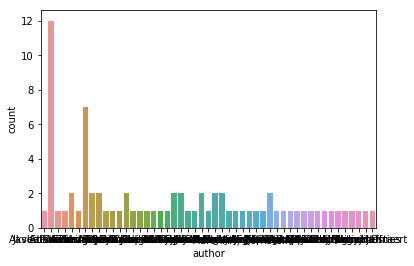

In [71]:
sns.countplot(x="author", data=nlp_over1k)

In [76]:
nlp_over1k["author"].value_counts().head(12)

Susan Li          12
Thomas Wolf        7
Robbie Allen       2
Parul Pandey       2
Max Frenzel        2
Priya Dwivedi      2
James Le           2
Hamel Husain       2
Alvira Swalin      2
Elvis              2
Data Monsters      2
Gunnvant Saini     2
Name: author, dtype: int64

In [80]:
nlp_sorted.iloc[8, 9]

'https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a?source=tag_archive---------0---------------------'